In [ ]:
import pandas as pd

In [ ]:
col_names = [ #указать ссылку где взяли датасет
 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'sex',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

In [62]:
df = pd.read_csv('data.csv',
                   sep=',', # разделитель данных в файле
                   #header=0, # номер строки с заголовками, нумерация с нуля
                   header=None, # если заголовки отсутствуют
                   names=col_names,
                   skipinitialspace=True,
                   na_values='?', 
                   comment='|'
                  )
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [53]:
df.describe() #статистика по числовым столбцам

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [63]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [64]:
df = df.dropna()
print("Размер таблицы:", df.shape)
df.isna().sum()

Размер таблицы: (30162, 15)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [79]:
numeric_features = [
    'age', 'fnlwgt', 'education-num', 
    'capital-gain', 'capital-loss', 'hours-per-week'
]

categorical_features = [
    'workclass', 'education', 'marital-status', 'occupation', 
    'relationship', 'race', 'sex', 'native-country'
]

In [ ]:
# from sklearn.impute import SimpleImputer
# # простая стратегия заполнения
# num_imputer = SimpleImputer(strategy='median')
# cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Трансформер для разных типов признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler())
        ]), numeric_features),

        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)


In [103]:
x = df.drop(columns=['income'])
y = df['income'].apply(lambda s: 1 if s.strip() == '>50K' else 0)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y #соотношение классов в целевой переменной сохраняется таким же, как и в исходных данных 90-10 90-10? f yt 90-10 40-60
)

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# oбучение Random Forest и вычисление важности признаков

rf = RandomForestClassifier(
    n_estimators=100, 
    criterion='gini',      # entropy
    random_state=0,
    bootstrap=True, 
    max_features='sqrt', 
    n_jobs=-1
)

pipe_gini = make_pipeline(preprocessor, rf)
pipe_gini.fit(x_train, y_train)

# извлекаем имена признаков после one-hot кодирования
ct = pipe_gini.named_steps['columntransformer']
num_names = numeric_features
ohe = ct.named_transformers_['cat'].named_steps['onehot']
ohe_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = num_names + ohe_names

# извлекаем важности признаков
importances = pipe_gini.named_steps['randomforestclassifier'].feature_importances_
feat_imp_gini = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_gini = feat_imp_gini.sort_values('importance', ascending=False).reset_index(drop=True)

# топ-20 признаков
print(feat_imp_gini.head(20))


                              feature  importance
0                              fnlwgt    0.159269
1                                 age    0.152573
2                        capital-gain    0.096988
3                      hours-per-week    0.082646
4                       education-num    0.059496
5   marital-status_Married-civ-spouse    0.055940
6                relationship_Husband    0.046891
7                        capital-loss    0.028727
8        marital-status_Never-married    0.023041
9          occupation_Exec-managerial    0.018574
10          occupation_Prof-specialty    0.013899
11                education_Bachelors    0.013281
12         relationship_Not-in-family    0.012617
13                         sex_Female    0.011799
14                  workclass_Private    0.010893
15                  relationship_Wife    0.010793
16                           sex_Male    0.010192
17                  education_Masters    0.008954
18         workclass_Self-emp-not-inc    0.008801


In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# oбучение Random Forest и вычисление важности признаков

rf = RandomForestClassifier(
    n_estimators=100, 
    criterion='entropy',
    random_state=0,
    bootstrap=True, 
    max_features='sqrt', 
    n_jobs=-1
)

pipe_entropy = make_pipeline(preprocessor, rf)
pipe_entropy.fit(x_train, y_train)

# извлекаем имена признаков после one-hot кодирования
ct = pipe_entropy.named_steps['columntransformer']
num_names = numeric_features
ohe = ct.named_transformers_['cat'].named_steps['onehot']
ohe_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = num_names + ohe_names

# извлекаем важности признаков
importances = pipe_entropy.named_steps['randomforestclassifier'].feature_importances_
feat_imp_entropy = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_entropy = feat_imp_entropy.sort_values('importance', ascending=False).reset_index(drop=True)

# топ-20 признаков
print(feat_imp_entropy.head(20))


                              feature  importance
0                              fnlwgt    0.160174
1                                 age    0.159222
2                        capital-gain    0.090027
3                      hours-per-week    0.084405
4   marital-status_Married-civ-spouse    0.054317
5                       education-num    0.052336
6                relationship_Husband    0.040380
7                        capital-loss    0.027345
8        marital-status_Never-married    0.027066
9          occupation_Exec-managerial    0.016775
10         relationship_Not-in-family    0.014275
11          occupation_Prof-specialty    0.013860
12                  relationship_Wife    0.012979
13             relationship_Own-child    0.012883
14                         sex_Female    0.012088
15                  workclass_Private    0.011560
16                           sex_Male    0.010676
17                education_Bachelors    0.010659
18         workclass_Self-emp-not-inc    0.008763


In [107]:
y_pred = pipe_gini.predict(x_test)
y_proba = pipe_gini.predict_proba(x_test)[:, 1]  # вероятность класса 1 (>50K)

In [108]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4185  346]
 [ 568  934]]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# отчёт по классификации
creport = classification_report(y_test, y_pred, target_names=['<=50K','>50K'])
print("Classification Report:\n", creport)

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4531
        >50K       0.73      0.62      0.67      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033



AUC: 0.8963192165467011


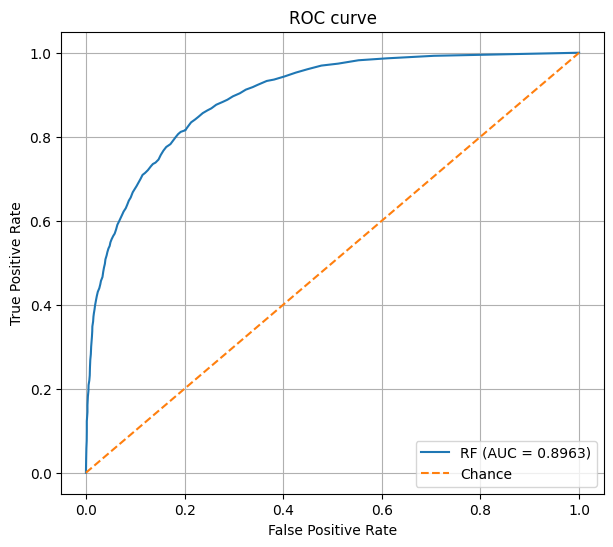

In [110]:
from sklearn.metrics import roc_curve, auc
# ROC + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'RF (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [111]:
# общая точность классификации
acc_100 = accuracy_score(y_test, y_pred)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(acc_100))

Model accuracy score with 100 decision-trees : 0.8485


In [112]:
# cохранение таблицы с y_true, y_pred и абсолютной ошибкой
results_df = x_test.copy().reset_index(drop=True)
results_df['y_true'] = y_test.reset_index(drop=True)
results_df['y_pred'] = y_pred
# lля классификации абсолютная ошибка как |y_true - y_pred|
results_df['abs_error'] = (results_df['y_true'] - results_df['y_pred']).abs()

results_df.to_csv("adult_classification_results.csv", index=False)
print("Saved results to adult_classification_results.csv (содержит y_true, y_pred, abs_error)")

Saved results to adult_classification_results.csv (содержит y_true, y_pred, abs_error)


In [ ]:
TOP_K = 10
top_features = feat_imp_gini['feature'].head(TOP_K).tolist()
print("Top features by Gini (top {}):".format(TOP_K), top_features)

x_train_trans = pipe_gini.named_steps['columntransformer'].transform(x_train)
x_test_trans = pipe_gini.named_steps['columntransformer'].transform(x_test)

# Преобразуем в плотный формат
if hasattr(x_train_trans, "toarray"):
    x_train_trans = x_train_trans.toarray()
    x_test_trans = x_test_trans.toarray()

feature_names = list(feat_imp_gini['feature'])

# Формируем DataFrame из трансформированных признаков
x_train_trans_df = pd.DataFrame(x_train_trans, columns=feature_names)
x_test_trans_df = pd.DataFrame(x_test_trans, columns=feature_names)

# берём top-k
x_train_topk = x_train_trans_df[top_features]
x_test_topk = x_test_trans_df[top_features]

# переобучаем RF на топ-k признаков
rf_topk = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf_topk.fit(x_train_topk, y_train)
y_pred_topk = rf_topk.predict(x_test_topk)
print("Accuracy on top-{} features: {:.4f}".format(TOP_K, accuracy_score(y_test, y_pred_topk)))

Top features by Gini (top 10): ['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'education-num', 'marital-status_Married-civ-spouse', 'relationship_Husband', 'capital-loss', 'marital-status_Never-married', 'occupation_Exec-managerial']
Accuracy on top-10 features: 0.8109


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_topk = mean_absolute_error(y_test, y_pred_topk)
mse_topk = mean_squared_error(y_test, y_pred_topk)
r2_topk = r2_score(y_test, y_pred_topk)

print("MAE (top-{} features): {:.4f}".format(TOP_K, mae_topk))
print("MSE (top-{} features): {:.4f}".format(TOP_K, mse_topk))

MAE (top-10 features): 0.1891
MSE (top-10 features): 0.1891
